Instrucciones:

Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la siguiente tabla:

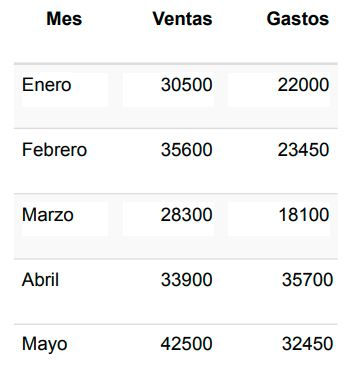

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

Importamos nuestras librerias

In [1]:
import numpy as np
import pandas as pd

Creamos el dataframe que se nos pide de acuerdo a la imagen que se nos ha dado

In [3]:
Ventas_Gastos = pd.DataFrame(data = {'Mes': ["Enero","Febrero","Marzo","Abril","Mayo"],    #Se alimenta de un diccionario
                                     'Ventas': [30500,35600,28300,33900,42500],
                                      'Gastos': [22000,23450,18100,35700,32450]})
Ventas_Gastos

,Mes,Ventas,Gastos
0,Enero,30500,22000
1,Febrero,35600,23450
2,Marzo,28300,18100
3,Abril,33900,35700
4,Mayo,42500,32450


Creamos la columna 1 que es igual a : Columna 1 = Gasto/Ventas*100

In [5]:
Ventas_Gastos = (
              Ventas_Gastos.assign(col1=lambda x: x.Gastos/x.Ventas * 100) #asignando un valor a cada fila de col1
)

Ventas_Gastos

,Mes,Ventas,Gastos,col1
0,Enero,30500,22000,72.131148
1,Febrero,35600,23450,65.870787
2,Marzo,28300,18100,63.957597
3,Abril,33900,35700,105.309735
4,Mayo,42500,32450,76.352941


Creamos nuestra columna 2 que es igual a = Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”, caso contrario imprimir “Meta no Superada”

In [7]:
Ventas_Gastos['Col2'] = Ventas_Gastos.Ventas.apply( #se rellena a partir de una col ya conocida
              lambda x: ("Meta Superada" if x >= 30000 else "Meta No superada"))   

Ventas_Gastos

,Mes,Ventas,Gastos,col1,Col2
0,Enero,30500,22000,72.131148,Meta Superada
1,Febrero,35600,23450,65.870787,Meta Superada
2,Marzo,28300,18100,63.957597,Meta No superada
3,Abril,33900,35700,105.309735,Meta Superada
4,Mayo,42500,32450,76.352941,Meta Superada


Tenemos dos formas de crear la columna 3 que seria igual a : 
Columna 3 = Si Gasto>Ventas, calcular el sobre gasto
Veamos las dos formas

In [10]:
#Lo podemos hacer iterando con un For
Ventas_Gastos['Col3'] = [Ventas_Gastos.Gastos[i] - Ventas_Gastos.Ventas[i] if
                         Ventas_Gastos.Gastos[i] > Ventas_Gastos.Ventas[i] else 0 for i in range(len(Ventas_Gastos))]

#En la segunda forma hacemos uso de la funcion WHERE
Col32 = Ventas_Gastos.Gastos - Ventas_Gastos.Ventas
Ventas_Gastos['Col3.2'] = Col32.where(Ventas_Gastos.Gastos >= Ventas_Gastos.Ventas, other = 0 )

Ventas_Gastos

,Mes,Ventas,Gastos,col1,Col2,Col3,Col3.2
0,Enero,30500,22000,72.131148,Meta Superada,0,0
1,Febrero,35600,23450,65.870787,Meta Superada,0,0
2,Marzo,28300,18100,63.957597,Meta No superada,0,0
3,Abril,33900,35700,105.309735,Meta Superada,1800,1800
4,Mayo,42500,32450,76.352941,Meta Superada,0,0


Obtener el total de las ventas de los últimos 3 meses

In [11]:
print(sum(Ventas_Gastos.tail(3)["Ventas"]))

104700


Obtener el total de gastos de febrero a abril

In [12]:
print(sum(Ventas_Gastos[1:4]["Gastos"]))

77250
